### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Loading the dataset

In [2]:
house=pd.read_csv("housing data.csv")
house.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


### checking the shape of the data

In [3]:
house.shape

(1418, 13)

### checking the object type and other attributesof data

In [4]:
house.info

<bound method DataFrame.info of         Id  OverallQual  YearBuilt  TotalBsmtSF Electrical  GrLivArea  \
0        1            7       2003          856      SBrkr       1710   
1        2            6       1976         1262      SBrkr       1262   
2        3            7       2001          920      SBrkr       1786   
3        4            7       1915          756      SBrkr       1717   
4        5            8       2000         1145      SBrkr       2198   
...    ...          ...        ...          ...        ...        ...   
1413  1414            6       1999          953      SBrkr       1647   
1414  1415            6       1978         1542      SBrkr       2073   
1415  1416            7       1941         1152      SBrkr       2340   
1416  1417            5       1950         1078      FuseA       1078   
1417  1418            5       1965         1256      SBrkr       1256   

      FullBath GarageType  GarageCars  GarageArea  Fence MiscFeature  \
0            2     

### checking the missing values

In [5]:
house.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

### from above we can see some missing data in the data eg(Electrical,garagetype,Miscfeatures,fence)

In [6]:
# select columns from the data
house.select_dtypes(include=np.number).columns
# sice overallaua,fullbath,garagecars are numbers but represent the categorical data lets convert them into object datatypes
for i in ["OverallQual","FullBath","GarageCars"]:
    house[i]=house[i].astype(object)

In [7]:
# lets drop id since its ajust an index value from 1 to 10
del house["Id"]

### five point summay of the data

In [8]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


###  from the  five points summary we can get a hint of outliers in totalbasmntSf,grLivArea,GargrageArea,SalesPrice

In [9]:
house.describe(include=object).T

,count,unique,top,freq
OverallQual,1418,10,5,380
Electrical,1417,5,SBrkr,1300
FullBath,1418,4,2,747
GarageType,1275,6,Attchd,800
GarageCars,1418,5,2,787
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


C:\Users\Shefali\AppData\Local\Temp\ipykernel_18424\1963154860.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr(),annot=True,vmax=1,vmin=-1)


<Axes: >

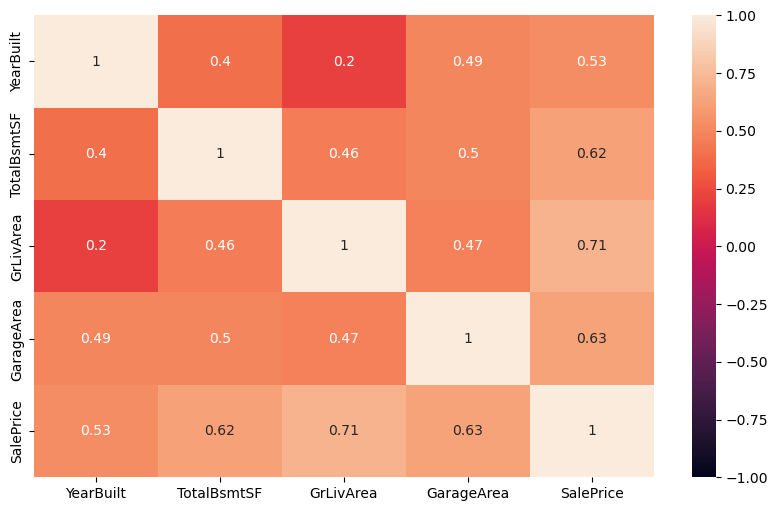

In [10]:
# correlation heatmap
plt.rcParams["figure.figsize"]=(10,6)  #for whole sheet
plt.figure(figsize=(10,6))# for current plot
sns.heatmap(house.corr(),annot=True,vmax=1,vmin=-1)

### inferences
* yearBuilt has less correlation with the GrLivArea
* GrLivArea has similarly less correlation with the YearBuilt

C:\Users\Shefali\AppData\Local\Temp\ipykernel_18424\109265338.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr()[(house.corr()>0.5)|(house.corr()<-0.5)],annot=True,vmax=1,vmin=-1)


<Axes: >

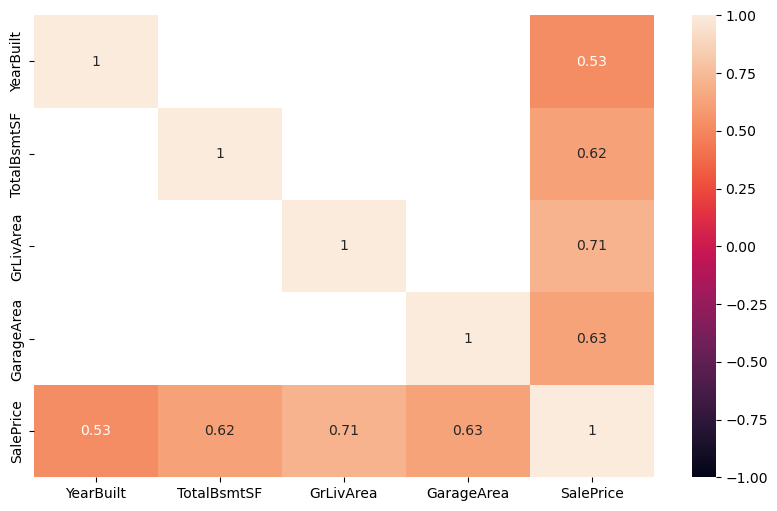

In [11]:
plt.rcParams["figure.figsize"]=(10,6)  #for whole sheet
plt.figure(figsize=(10,6))# for current plot
sns.heatmap(house.corr()[(house.corr()>0.5)|(house.corr()<-0.5)],annot=True,vmax=1,vmin=-1)

In [12]:
# lets look at the coeffecient of varience in columns 
(house.select_dtypes(np.number).std()/house.select_dtypes(np.number).mean())*100

YearBuilt       1.524867
TotalBsmtSF    41.186073
GrLivArea      34.706296
GarageArea     45.717425
SalePrice      43.918480
dtype: float64

### univerate analysis 

In [13]:
house.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   YearBuilt    1418 non-null   int64
 1   TotalBsmtSF  1418 non-null   int64
 2   GrLivArea    1418 non-null   int64
 3   GarageArea   1418 non-null   int64
 4   SalePrice    1418 non-null   int64
dtypes: int64(5)
memory usage: 55.5 KB


In [14]:
house_num=house.select_dtypes(np.number)
house_num.head(2)

,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,2003,856,1710,548,208500
1,1976,1262,1262,460,181500


C:\Users\Shefali\AppData\Local\Temp\ipykernel_18424\845212404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house[i])
C:\Users\Shefali\AppData\Local\Temp\ipykernel_18424\845212404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house[i])
C:\Users\Shefali\AppData\Local\Temp\ipykernel_18

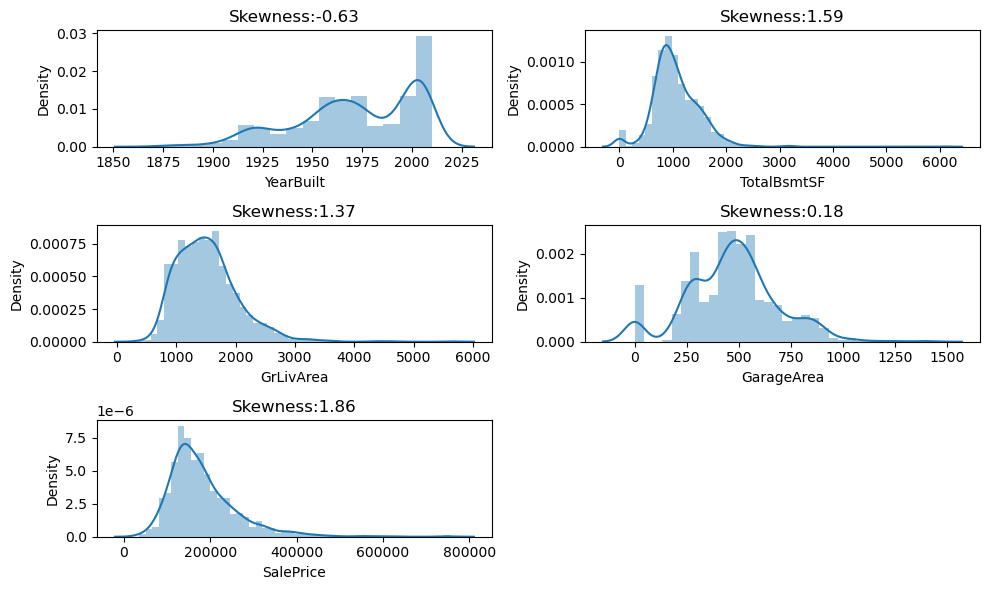

In [15]:
t=1
for i in house_num.columns:
    plt.subplot(3,2,t)
    sns.distplot(house[i])
    plt.title('Skewness:%.2f'%(house[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

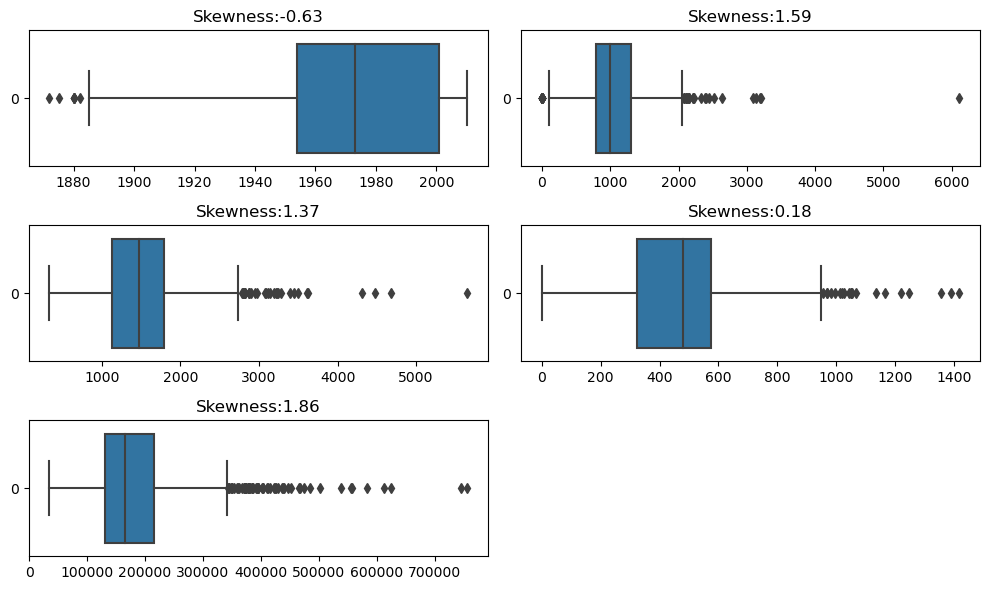

In [16]:
t=1
for i in house_num.columns:
    plt.subplot(3,2,t)
    sns.boxplot(house[i],orient="h")
    plt.title('Skewness:%.2f'%(house[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

### inferences
* skewness in  plot 2 ,3 and plot 5 are more due the outliers

In [17]:
# lets take category  columns
house_cat=house.select_dtypes(object)
house_cat.head(2)

,OverallQual,Electrical,FullBath,GarageType,GarageCars,Fence,MiscFeature
0,7,SBrkr,2,Attchd,2,NaN,NaN
1,6,SBrkr,2,Attchd,2,NaN,NaN


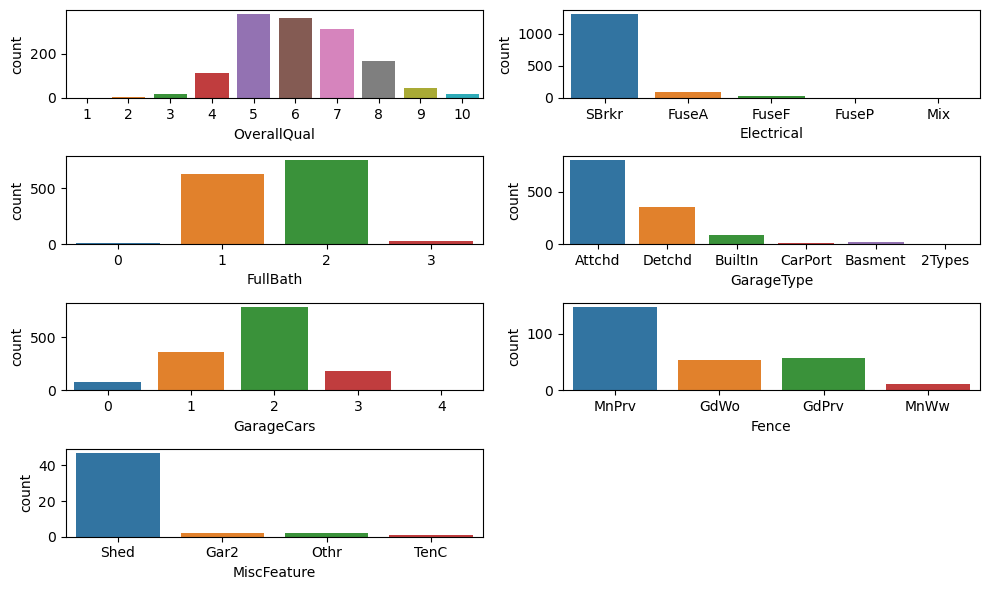

In [18]:
t=1
for i in house_cat.columns:
    plt.subplot(4,2,t)
    sns.countplot(data=house,x=i)
    
    t=t+1
plt.tight_layout()
plt.show()

In [19]:
# inferneces


C:\Users\Shefali\AppData\Local\Temp\ipykernel_18424\3964696323.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house.loc[:,i])
C:\Users\Shefali\AppData\Local\Temp\ipykernel_18424\3964696323.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house.loc[:,i])
C:\Users\Shefali\AppData\Local\T

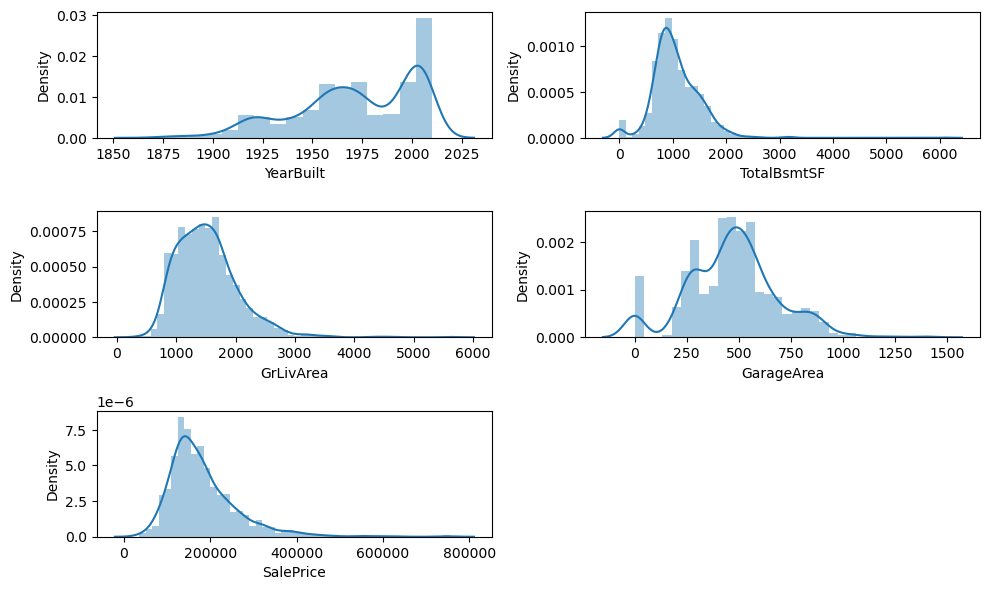

In [20]:
# self 
#displot on the data (Univerate anyalysis)

nrows=3
ncols=2
repeater=1

plt.figure(figsize=(10,6))
for i in house_num:
    plt.subplot(nrows,ncols,repeater)
    sns.distplot(house.loc[:,i])
    repeater+=1
    
plt.tight_layout()
plt.show()

### bivarate analysis


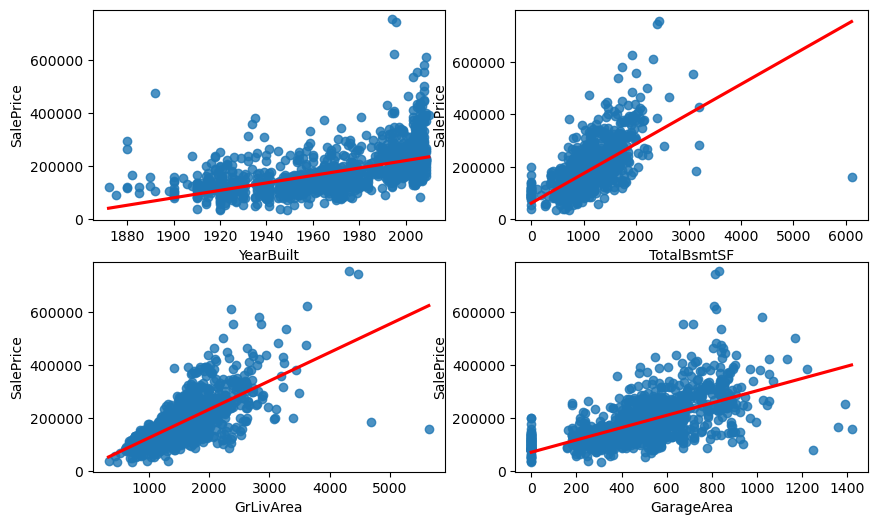

In [21]:
# lets do number vs number analysis
t=1
for i in house_num:
    if i != "SalePrice":
        plt.subplot(2,2,t)
        sns.regplot(x=house[i],y=house["SalePrice"],line_kws={"color":"red"},ci=0)
    t=t+1
plt.show()
# the line which could map the linear relation  between x and y axis in the plot is called reg line

### inference
* the newbuilt property is more selling in the nearest years
* those property have no basement area have less selling price and also same goes for living area

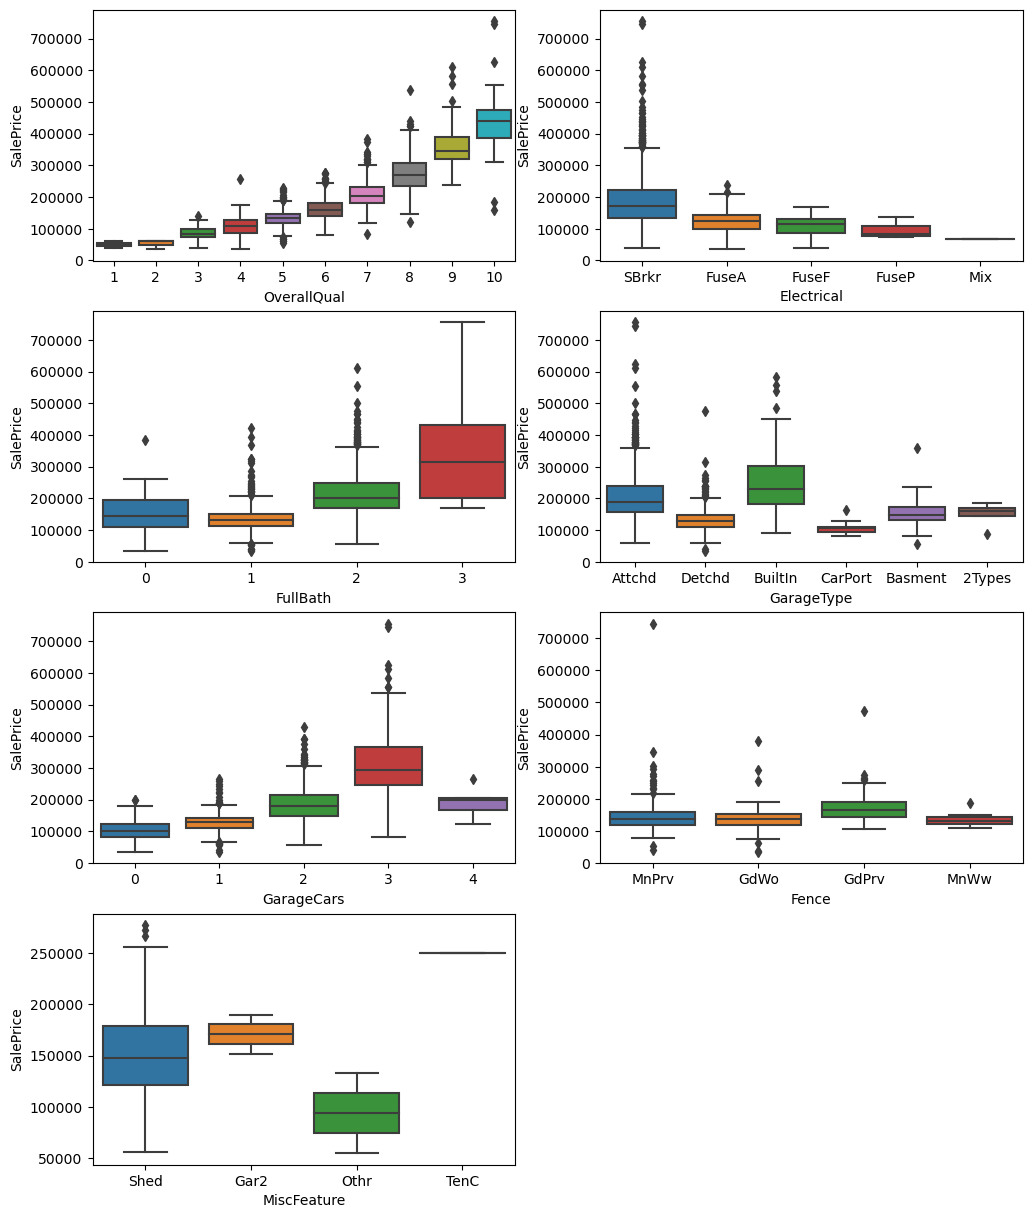

In [22]:
# lets do number and category analysis
# lets do number vs number analysis
t=1
plt.figure(figsize=(12,15))
for i in house_cat.columns:
        plt.subplot(4,2,t)
        sns.boxplot(x=house[i],y=house["SalePrice"],data=house)
        t=t+1
plt.show()

### inference 
* where no of baths are more sell price also more
* median of builtin garage is more
* no of smaples in overall is 10 
* the sell of Garage cars  3 is more comapred to 2 in the house data
 

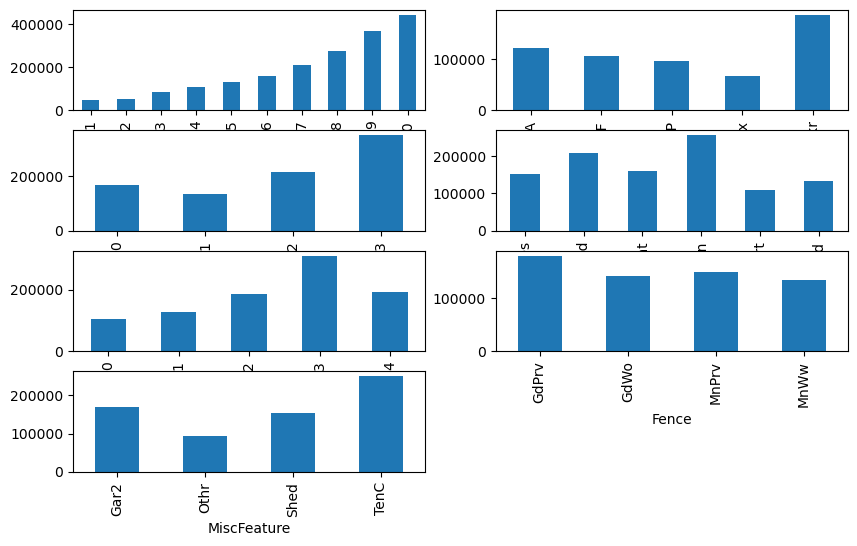

In [23]:
# lets do number and category analysis
# lets do number vs number analysis
t=1
for i in house_cat.columns:
        plt.subplot(4,2,t)
        house.groupby(i)['SalePrice'].mean().plot(kind="bar")
        t=t+1
plt.show()

### statistical test 

### target variable is mostily affected by 
* GrlivArea
* ToatalBstArea
* overallQulty
* fullBath
* Garagecars



In [24]:
# Salesprice and GrLivArea

# test the assumnations 
for i in ["SalePrice","GrLivArea"]:
    _,p=stats.shapiro(house[i])
    if p<0.5:
        print("reject the Ho:data is not Normal")
    else:    
        print("Failed to reject Ho: data is normal")
        

_,p=stats.levene(house["SalePrice"],house["GrLivArea"])
if p<0.5:
     print(i,"reject the Ho:Variances are not equal")
else:    
    print(i,"Failed to reject Ho: variences are equal")

reject the Ho:data is not Normal
reject the Ho:data is not Normal
GrLivArea reject the Ho:Variances are not equal


In [25]:
# we will go with the non parametric test --- mannwithnyu
# Ho: mu1=mu2: There is no relation between SalesPrice and GrLivArea 
# H1: mu1!=mu2 : There is relation between SalesPrice and GrLivArea

_,p=stats.mannwhitneyu(house["SalePrice"],house["GrLivArea"])
if p<0.05:
    print("Reject Ho: There is realtion SalesPrice and GrLivArea")
else:
    print("Fail to Reject Ho:There is no relation between SalesPrice and GrLivArea" )

Reject Ho: There is realtion SalesPrice and GrLivArea


In [26]:
# Salesprice and TotalBsmtSF

# test the assumnations 
for i in ["SalePrice","TotalBsmtSF"]:
    _,p=stats.shapiro(house[i])
    if p<0.5:
        print("reject the Ho:data is not Normal")
    else:    
        print("Failed to reject Ho: data is normal")
        

_,p=stats.levene(house["SalePrice"],house["TotalBsmtSF"])
if p<0.5:
     print(i,"reject the Ho:Variances are not equal")
else:    
    print(i,"Failed to reject Ho: variences are equal")

reject the Ho:data is not Normal
reject the Ho:data is not Normal
TotalBsmtSF reject the Ho:Variances are not equal


In [27]:
# we will go with the non parametric test --- mannwithnyu
# Ho: mu1=mu2: There is no relation between SalesPrice and TotalBsmtSF
# H1: mu1!=mu2 : There is relation between SalesPrice and TotalBsmtSF

_,p=stats.mannwhitneyu(house["SalePrice"],house["TotalBsmtSF"])
if p<0.05:
    print("Reject Ho: There is realtion SalesPrice and TotalBsmtSF")
else:
    print("Fail to Reject Ho:There is no relation between SalesPrice and TotalBsmtSF" )

Reject Ho: There is realtion SalesPrice and TotalBsmtSF


In [28]:
# Salesprice and OverallQual

# test the assumnations 
for i in ["SalePrice","OverallQual"]:
    _,p=stats.shapiro(house[i])
    if p<0.5:
        print("reject the Ho:data is not Normal")
    else:    
        print("Failed to reject Ho: data is normal")
        

_,p=stats.levene(house["SalePrice"],house["OverallQual"])
if p<0.5:
     print(i,"reject the Ho:Variances are not equal")
else:    
    print(i,"Failed to reject Ho: variences are equal")

reject the Ho:data is not Normal
reject the Ho:data is not Normal
OverallQual reject the Ho:Variances are not equal


In [29]:
# lets check wether there is any effect of FulBath on Sales Price
# lets check the assumptions 

for i in range (0,4):
    _,p=stats.shapiro(house[house["FullBath"]==i]["SalePrice"])
    if p<0.5:
        print("FullBath",i,"reject the Ho:Data are not normal")
    else:    
        print("FullBath",i,"Failed to reject Ho: Data are normal")
        
samp1=house[house["FullBath"]==0]["SalePrice"]
samp2=house[house["FullBath"]==1]["SalePrice"]
samp3=house[house["FullBath"]==2]["SalePrice"]
samp4=house[house["FullBath"]==3]["SalePrice"]


_,p=stats.levene(samp1,samp2,samp3,samp3)
if p<0.5:
     print(i,"reject the Ho:Variances are not equal")
else:    
    print(i,"Failed to reject Ho: variences are equal")

FullBath 0 reject the Ho:Data are not normal
FullBath 1 reject the Ho:Data are not normal
FullBath 2 reject the Ho:Data are not normal
FullBath 3 reject the Ho:Data are not normal
3 reject the Ho:Variances are not equal


In [30]:
# assumptions doesnot met we can go with non parametric test-kruskal Wallis
# Ho: the fullBath has no relation with Saleprice
# Ha: the fullBath has  relation with Saleprice
_,p=stats.kruskal(samp1,samp2,samp3,samp4)
if p<0.5:
    print("Reject Ho: The fullBath has relation with SalesPrice")
else:
    print("failed to Reject Ho: The fullBath has no  relation with SalesPrice")

Reject Ho: The fullBath has relation with SalesPrice


### Data preprocessing 

## Missing value treatment 

**You can perform these three steps to treat missing values**

* closet fit
* central value(mean,medain,mode)
* delete (when nan is very few in rows or very much in columns)

In [31]:
# how much % data is missing in each column
((house.isnull().sum()/house.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [32]:
house.head(2)

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


In [33]:
# lets impute the values in electrical
house[house["Electrical"].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [34]:
# lets impute the values with mode
house["Electrical"].fillna(house["Electrical"].mode()[0],inplace=True)

In [35]:
house.loc[(house["GarageCars"]==0)&(house["GarageArea"]==0),"GarageType"]="NoGarage"

In [36]:
house["GarageType"].value_counts()

Attchd      800
Detchd      354
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [37]:
# lets impute data in garagetype
house[house["GarageType"].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [38]:
# lets calculate the mode of the garage type where car=1
house[house["GarageCars"]==1]["GarageType"].mode()[0]

'Detchd'

In [39]:
house["GarageType"].fillna(house[house["GarageCars"]==1]["GarageType"].mode()[0],inplace=True)

In [40]:
# lets impute the missing values in MiscFeatures and fence
# lets do the imputation in fences
house["Fence"].value_counts()

MnPrv    148
GdPrv     58
GdWo      53
MnWw      11
Name: Fence, dtype: int64

In [41]:
house["Fence"]=np.where(house["Fence"].isnull(),"NotAvailable","Available")

In [42]:
# house["Fence"]=np.where(house["Fence"].isnull(),0,1)

In [43]:
house["Fence"].value_counts()

NotAvailable    1148
Available        270
Name: Fence, dtype: int64

In [44]:
stats.shapiro(house[house["Fence"]=="Available"]["SalePrice"])

ShapiroResult(statistic=0.7092494964599609, pvalue=2.282951241831908e-21)

In [45]:
samp1=house[house["Fence"]=="Available"]["SalePrice"]
samp2=house[house["Fence"]=="NotAvailable"]["SalePrice"]
stats.mannwhitneyu(samp1,samp2)


MannwhitneyuResult(statistic=108598.0, pvalue=1.842459050609252e-14)

In [46]:
if p<0.05:
    print("Reject Ho: There is no relation between Saleprice and Fence")
else:
    print("Fail to Reject Ho: There is a relation between Saleprice and Fence")

Reject Ho: There is no relation between Saleprice and Fence


In [47]:
house.groupby("Fence")["SalePrice"].median()

Fence
Available       141750.0
NotAvailable    174250.0
Name: SalePrice, dtype: float64

In [48]:
# lets treat a missing value in MiscFeatures
house["MiscFeature"]=np.where (house["MiscFeature"].isnull(),0,1)

In [49]:
house.groupby("MiscFeature")["SalePrice"].mean()

MiscFeature
0    183189.017570
1    153205.634615
Name: SalePrice, dtype: float64

In [50]:
house["MiscFeature"].value_counts()

0    1366
1      52
Name: MiscFeature, dtype: int64

#### inferences
* since in both columns the average price where the data is present is low .logically
* these features should have increased the price.This difference could be the missing lot of values 
* values in the columns .its better to drop these columns


In [51]:
house.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
Fence          0
MiscFeature    0
SalePrice      0
dtype: int64

# outlier treatment


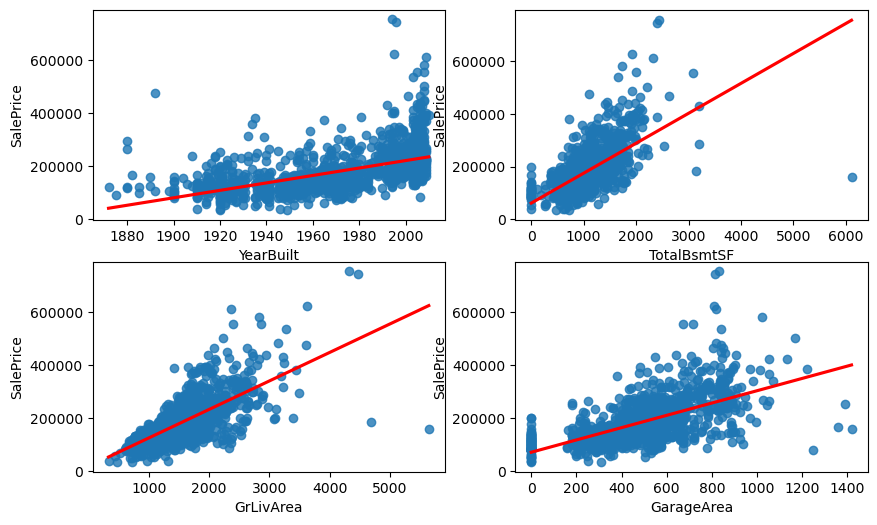

In [52]:
# lets do number vs number analysis
t=1
for i in house_num:
    if i != "SalePrice":
        plt.subplot(2,2,t)
        sns.regplot(x=house[i],y=house["SalePrice"],line_kws={"color":"red"},ci=0)
    t=t+1
plt.show()
# the line which could map the linear relation  between x and y axis in the plot is called reg line

In [53]:
house[house["TotalBsmtSF"]>6000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NotAvailable,0,160000


In [54]:
# total basement area 
# standard scaler se bss scale transfor,hogi aur kuch outlier or skewness mein kuch nii hoga
# we have to remove the outliers 

house[house["TotalBsmtSF"]>6000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NotAvailable,0,160000


In [55]:
house[house["GrLivArea"]>4500]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
500,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,NotAvailable,0,184750
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NotAvailable,0,160000


In [56]:
house[house["GarageArea"]>1300]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
558,8,2008,2042,SBrkr,2042,2,Attchd,3,1390,NotAvailable,0,253293
1155,4,1961,1249,SBrkr,1622,1,2Types,4,1356,NotAvailable,0,168000
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NotAvailable,0,160000


In [57]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
MiscFeature,1418.0,0.036671,0.188020,0.0,0.00,0.0,0.0,1.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


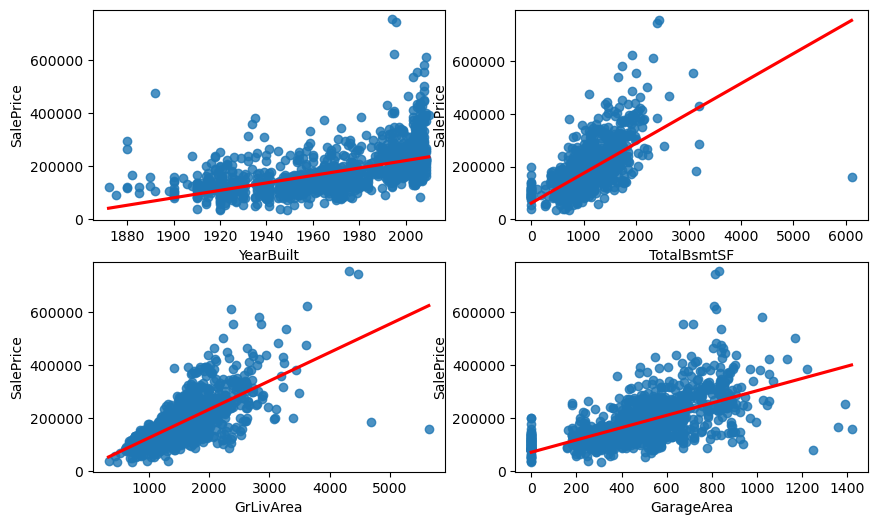

In [58]:
# lets do number vs number analysis
t=1
for i in house_num:
    if i != "SalePrice":
        plt.subplot(2,2,t)
        sns.regplot(x=house[i],y=house["SalePrice"],line_kws={"color":"red"},ci=0)
    t=t+1
plt.show()
# the line which could map the linear relation  between x and y axis in the plot is called reg line

In [59]:
q3=house_num.quantile(0.75)
q1=house_num.quantile(0.25)

iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
#outliers = df.select_dtypes(include =np.number)[(df.select_dtypes(include =np.number) >= lower) & (df.select_dtypes(include =np.number)<= upper)]
outliers_mask = (house_num < lower) | (house_num > upper)

# Remove rows with outliers
house[~outliers_mask.any(axis=1)]

# Display the resulting DataFrame without outliers
house.head(1)

#from sklearn.impute import KNNImputer

# Example: Use KNN imputation
#imputer = KNNImputer(n_neighbors=5)
#df_no_outliers_filled = pd.DataFrame(imputer.fit_transform(outliers), columns=outliers.columns)

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NotAvailable,0,208500


In [60]:
#  we will do scaling after train and spilit

# Encoding 

In [61]:
house.YearBuilt.value_counts()

2006    67
2005    61
2004    51
2007    49
2003    45
        ..
1882     1
1875     1
1911     1
1917     1
1872     1
Name: YearBuilt, Length: 110, dtype: int64

In [62]:
house.Electrical.value_counts()

SBrkr    1301
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [63]:
house["Electrical"]=np.where(house["Electrical"]=="SBrkr",1,0)

In [64]:
# frequency encoding
d=house.GarageType.value_counts(normalize=True).to_dict()# relative frequency

In [65]:
house["GarageType"]=house["GarageType"].map(d)

In [66]:
d

{'Attchd': 0.5641748942172073,
 'Detchd': 0.2933709449929478,
 'BuiltIn': 0.0613540197461213,
 'NoGarage': 0.057122708039492244,
 'Basment': 0.013399153737658674,
 'CarPort': 0.006346967559943582,
 '2Types': 0.004231311706629055}

In [67]:
house.GarageType.value_counts()

0.564175    800
0.293371    416
0.061354     87
0.057123     81
0.013399     19
0.006347      9
0.004231      6
Name: GarageType, dtype: int64

In [68]:
house["Fence"].value_counts()

NotAvailable    1148
Available        270
Name: Fence, dtype: int64

In [69]:
house["Fence"]=np.where(house["Fence"]=="NotAvailable",1,0)

In [70]:
# frequency encoding
a=house.Fence.value_counts(normalize=True).to_dict()# relative frequency

In [71]:
house["Fence"]=house["Fence"].map(a)

In [72]:
house["OverallQual"]=house["OverallQual"].astype("int")
house["FullBath"]=house["FullBath"].astype("int")

house["GarageCars"]=house["GarageCars"].astype("int")

In [73]:
house.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,1,1710,2,0.564175,2,548,0.809591,0,208500
1,6,1976,1262,1,1262,2,0.564175,2,460,0.809591,0,181500
2,7,2001,920,1,1786,2,0.564175,2,608,0.809591,0,223500
3,7,1915,756,1,1717,1,0.293371,3,642,0.809591,0,140000
4,8,2000,1145,1,2198,2,0.564175,3,836,0.809591,0,250000


In [74]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1418 non-null   int32  
 1   YearBuilt    1418 non-null   int64  
 2   TotalBsmtSF  1418 non-null   int64  
 3   Electrical   1418 non-null   int32  
 4   GrLivArea    1418 non-null   int64  
 5   FullBath     1418 non-null   int32  
 6   GarageType   1418 non-null   float64
 7   GarageCars   1418 non-null   int32  
 8   GarageArea   1418 non-null   int64  
 9   Fence        1418 non-null   float64
 10  MiscFeature  1418 non-null   int32  
 11  SalePrice    1418 non-null   int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 105.4 KB


# transform


Index(['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice'], dtype='object')

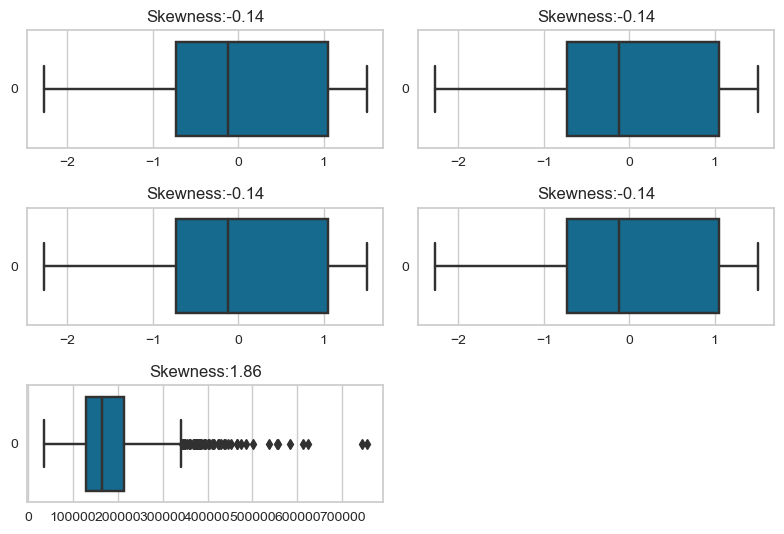

In [241]:
t=1
for i in house_num.columns:
    plt.subplot(3,2,t)
    sns.boxplot(house[i],orient="h")
    plt.title('Skewness:%.2f'%(house[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

In [76]:
import scipy.stats as stats

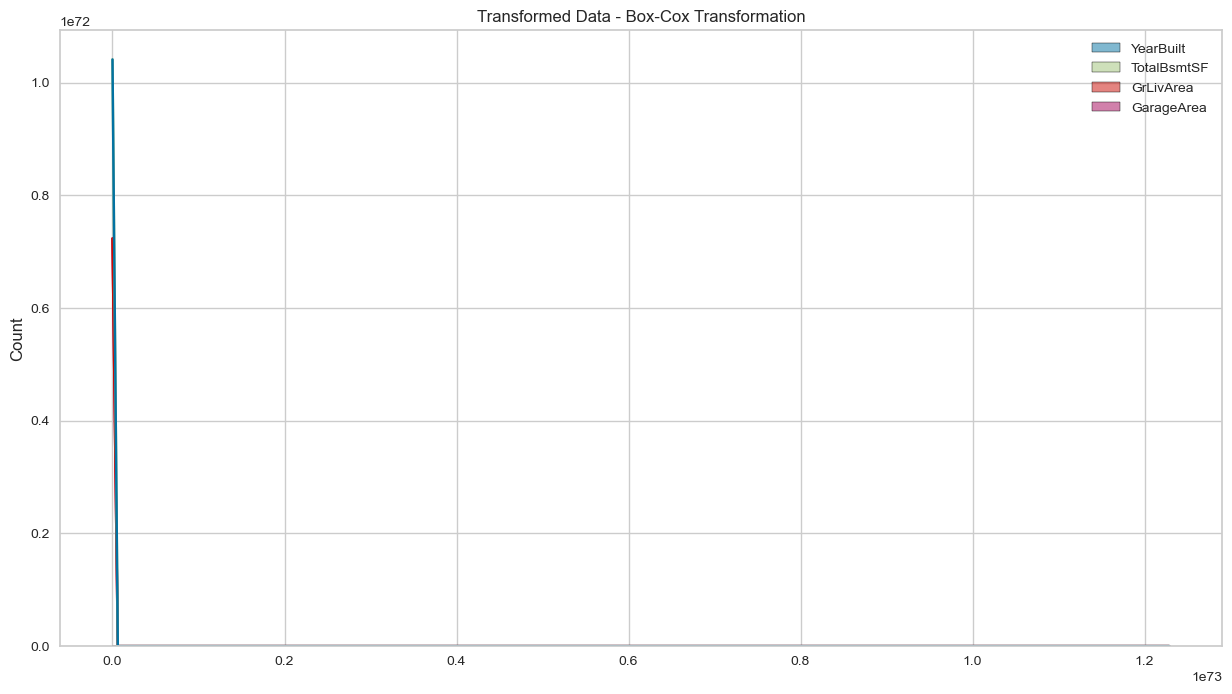

Lambda values:
YearBuilt: 22.53
TotalBsmtSF: 0.74
GrLivArea: 0.01
GarageArea: 0.83


In [243]:
transformed_data = pd.DataFrame()
lambda_values = {}

for i in house_num:
    if i !="SalePrice":
        transformed_col, lambda_value = stats.yeojohnson(house_num[i] + 1)  # Adding 1 to handle zero values
        transformed_data[i] = transformed_col
        lambda_values[i] = lambda_value
    
# Visualize the transformed data
plt.figure(figsize=(15, 8))
sns.histplot(transformed_data, kde=True, color='orange', bins=30, multiple='stack')
plt.title('Transformed Data - Box-Cox Transformation')
plt.show()

# Display lambda values for each column
print("Lambda values:")
for column, lambda_value in lambda_values.items():
    print(f"{column}: {lambda_value:.2f}")

In [244]:
from sklearn.preprocessing import PowerTransformer

In [245]:
house.head(2
          )

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,1.145687,1.145687,1,1.145687,2,0.564175,2,1.145687,0.809591,0,208500
1,6,-0.006689,-0.006689,1,-0.006689,2,0.564175,2,-0.006689,0.809591,0,181500


#  Scaling

In [246]:
from sklearn.preprocessing import StandardScaler


In [247]:
sc=StandardScaler()

In [248]:
house.shape

(1418, 12)

In [249]:
house_num.shape

(1418, 5)

In [250]:
transformed_data

,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea
0,1.135931e+73,199.681084,7.832564,223.636700
1,8.368987e+72,266.504149,7.497781,193.397771
2,1.110671e+73,210.684401,7.880607,243.773560
3,4.131648e+72,182.049656,7.837076,255.032160
4,1.098243e+73,247.909463,8.110355,317.491545
...,...,...,...,...
1413,1.085948e+73,216.280169,7.791115,193.397771
1414,8.561757e+72,309.297617,8.045478,207.255108
1415,5.597057e+72,249.035373,8.179782,117.350101
1416,6.211332e+72,237.040645,7.324716,112.690949


In [251]:
for i in transformed_data:
    if i !="SalePrice":
        sc=StandardScaler()
        house[i]=sc.fit_transform(transformed_data)
        #x_test[i]=sc.transform(pd.DataFrame(x_test[i]))

#  date time


In [252]:
dob=["12-04-2001","3-07-2002","19-11-2003","22-02-2005","21-01-1999"]
name=["Ajay","Muskan","Ashok","Ridhi","Vikash"]

In [253]:
df=pd.DataFrame({"Name":name,"DOB":dob})
df

,Name,DOB
0,Ajay,12-04-2001
1,Muskan,3-07-2002
2,Ashok,19-11-2003
3,Ridhi,22-02-2005
4,Vikash,21-01-1999


In [254]:
df["DOB"]=pd.to_datetime(df["DOB"],format="%d-%m-%Y")

In [255]:
df.dtypes

Name            object
DOB     datetime64[ns]
dtype: object

In [256]:
df

,Name,DOB
0,Ajay,2001-04-12
1,Muskan,2002-07-03
2,Ashok,2003-11-19
3,Ridhi,2005-02-22
4,Vikash,1999-01-21


In [257]:
df["DOB"].dt.year

0    2001
1    2002
2    2003
3    2005
4    1999
Name: DOB, dtype: int64

In [258]:
df["DOB"].dt.month

0     4
1     7
2    11
3     2
4     1
Name: DOB, dtype: int64

In [259]:
df["DOB"].dt.day

0    12
1     3
2    19
3    22
4    21
Name: DOB, dtype: int64

In [260]:
df["DOB"].dt.weekday

0    3
1    2
2    2
3    1
4    3
Name: DOB, dtype: int64

In [261]:
df["Weekday"]=df["DOB"].dt.day_name()

In [262]:
df

,Name,DOB,Weekday
0,Ajay,2001-04-12,Thursday
1,Muskan,2002-07-03,Wednesday
2,Ashok,2003-11-19,Wednesday
3,Ridhi,2005-02-22,Tuesday
4,Vikash,1999-01-21,Thursday


In [263]:
house

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,1.145687,1.145687,1,1.145687,2,0.564175,2,1.145687,0.809591,0,208500
1,6,-0.006689,-0.006689,1,-0.006689,2,0.564175,2,-0.006689,0.809591,0,181500
2,7,1.048342,1.048342,1,1.048342,2,0.564175,2,1.048342,0.809591,0,223500
3,7,-1.639624,-1.639624,1,-1.639624,1,0.293371,3,-1.639624,0.809591,0,140000
4,8,1.000448,1.000448,1,1.000448,2,0.564175,3,1.000448,0.809591,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,0.953067,0.953067,1,0.953067,2,0.564175,2,0.953067,0.809591,0,175000
1414,6,0.067598,0.067598,1,0.067598,2,0.564175,2,0.067598,0.190409,0,210000
1415,7,-1.074902,-1.074902,1,-1.074902,2,0.564175,1,-1.074902,0.190409,1,266500
1416,5,-0.838180,-0.838180,0,-0.838180,1,0.293371,1,-0.838180,0.809591,0,142125


### train test split

In [264]:
import statsmodels.api as sma

In [265]:
x=house.drop("SalePrice",axis=1)
y=house["SalePrice"]
x=sma.add_constant(x)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,
                                              random_state=25)


print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(1134, 12) (284, 12) (1134,) (284,)


In [266]:
basemodel=sma.OLS(ytrain,xtrain).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     315.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          6.42e-281
Time:                        14:06:47   Log-Likelihood:                -13725.
No. Observations:                1134   AIC:                         2.747e+04
Df Residuals:                    1125   BIC:                         2.751e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.377e+04   9767.417     -9.601      0.000   -1.13e+05   -7.46e+04
OverallQual  3.276e+04   1385.673     23.641      0.000       3e+04    3.55e+04
YearBuilt    -164.3809    475.836     -0.345      0.730   -1098.006     769.244
TotalBsmtSF  -164.3809    475.836     -0.345      0.730   -1098.006     769.244
Electrical   3495.3485   4956.417      0.705      0.481   -6229.514    1.32e+04
GrLivArea    -164.3809    475.836     -0.345      0.730   -1098.006     769.244
FullBath     2.093e+04   2986.609      7.007      0.000    1.51e+04    2.68e+04
GarageType  -1.489e+04   7621.669     -1.953      0.051   -2.98e+04      68.025
GarageCars   2.502e+04   2342.923     10.677      0.000    2.04e+04    2.96e+04
GarageArea   -164.3809    475.836     -0.345      0.730   -1098.006     769.244
Fence        1268.9110   5587.399      0.227      0.820   -9693.985    1.22e+04
MiscFeature  4318.1105   7150.876      0.604      0.546   -9712.445    1.83e+04
==============================================================================
Omnibus:                      496.875   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5794.075
Skew:                           1.697   Prob(JB):                         0.00
Kurtosis:                      13.541   Cond. No.                     3.54e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: >

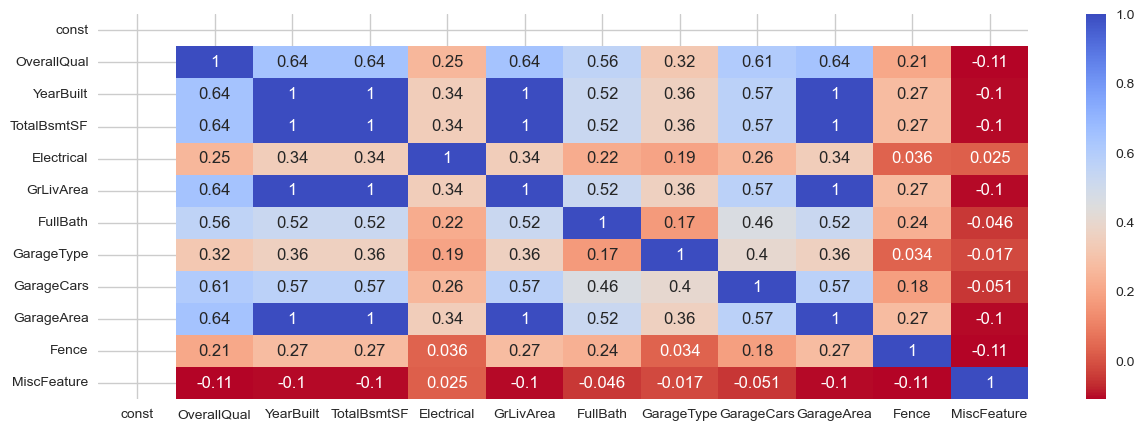

In [267]:
plt.figure(figsize=(15,5))
sns.heatmap(xtrain.corr(),annot=True,cmap="coolwarm_r")

In [268]:
from statsmodels.graphics.gofplots import qqplot # for QQ-plot

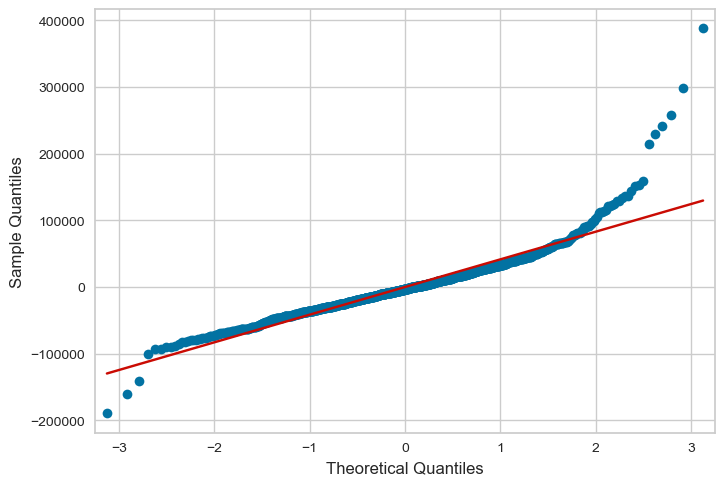

In [269]:
qqplot(basemodel.resid,line="r")
plt.show()

In [270]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import plot_tree 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN,KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

from sklearn.metrics import silhouette_score
from mlxtend.feature_selection import SequentialFeatureSelector


In [271]:
# Example: Remove features with VIF greater than a threshold (e.g., 5)
# Assuming 'X' is your feature matrix
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)
high_vif_features = vif_data[vif_data["VIF"] >5]["Feature"]
X_selected= x.drop(columns=high_vif_features)
print(X_selected.info())

        Feature        VIF
0         const  58.350982
1   OverallQual   2.135261
2     YearBuilt        inf
3   TotalBsmtSF        inf
4    Electrical   1.155390
5     GrLivArea        inf
6      FullBath   1.596276
7    GarageType   1.267065
8    GarageCars   1.910375
9    GarageArea        inf
10        Fence   1.111013
11  MiscFeature   1.024332
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1418 non-null   int32  
 1   Electrical   1418 non-null   int32  
 2   FullBath     1418 non-null   int32  
 3   GarageType   1418 non-null   float64
 4   GarageCars   1418 non-null   int32  
 5   Fence        1418 non-null   float64
 6   MiscFeature  1418 non-null   int32  
dtypes: float64(2), int32(5)
memory usage: 50.0 KB
None


C:\Users\Shefali\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [272]:
# Recalculate VIF for the remaining features
vif_data_remaining = pd.DataFrame()
vif_data_remaining["Feature"] = X_selected.columns
vif_data_remaining["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif_data_remaining)

       Feature        VIF
0  OverallQual  29.525666
1   Electrical  11.190883
2     FullBath  13.879899
3   GarageType   6.916566
4   GarageCars  11.331929
5        Fence   8.244024
6  MiscFeature   1.045124


* excluding the vif > 5

In [273]:
X_selected

,OverallQual,Electrical,FullBath,GarageType,GarageCars,Fence,MiscFeature
0,7,1,2,0.564175,2,0.809591,0
1,6,1,2,0.564175,2,0.809591,0
2,7,1,2,0.564175,2,0.809591,0
3,7,1,1,0.293371,3,0.809591,0
4,8,1,2,0.564175,3,0.809591,0
...,...,...,...,...,...,...,...
1413,6,1,2,0.564175,2,0.809591,0
1414,6,1,2,0.564175,2,0.190409,0
1415,7,1,2,0.564175,1,0.190409,1
1416,5,0,1,0.293371,1,0.809591,0


In [274]:
n=x.drop(["YearBuilt","TotalBsmtSF","GrLivArea","GarageArea"],axis=1)

y=y




x_train,x_test,y_train,y_test=train_test_split(n,y,
                                         test_size=0.30,
                                          random_state=21)

#xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

base_model=sma.OLS(y_train,x_train).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     332.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.09e-254
Time:                        14:06:55   Log-Likelihood:                -12016.
No. Observations:                 992   AIC:                         2.405e+04
Df Residuals:                     984   BIC:                         2.409e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.009e+05   8124.100    -12.417      0.000   -1.17e+05   -8.49e+04
OverallQual  3.439e+04   1416.143     24.286      0.000    3.16e+04    3.72e+04
Electrical   2253.3765   5500.167      0.410      0.682   -8540.029     1.3e+04
FullBath      1.94e+04   3088.201      6.281      0.000    1.33e+04    2.55e+04
GarageType  -1.964e+04   8351.385     -2.352      0.019    -3.6e+04   -3250.146
GarageCars   2.768e+04   2576.546     10.742      0.000    2.26e+04    3.27e+04
Fence       -1176.4819   6088.270     -0.193      0.847   -1.31e+04    1.08e+04
MiscFeature -3859.4631   7608.137     -0.507      0.612   -1.88e+04    1.11e+04
==============================================================================
Omnibus:                      302.439   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.169
Skew:                           1.322   Prob(JB):                         0.00
Kurtosis:                       8.408   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

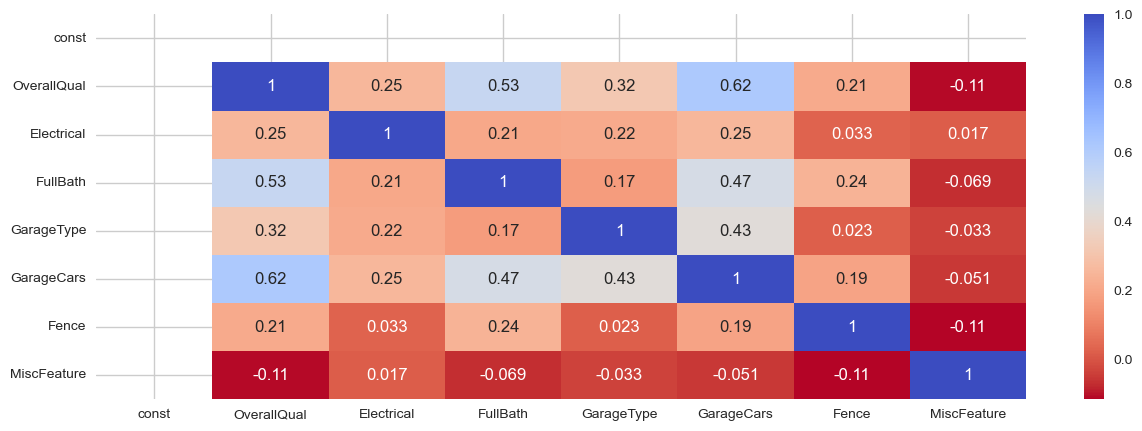

In [275]:
plt.figure(figsize=(15,5))
sns.heatmap(x_train.corr(),annot=True,cmap="coolwarm_r")

#  lets check model is linear is or not

In [276]:
import statsmodels.stats.api as smsa

In [277]:
p = smsa.linear_rainbow(base_model)[1]
p

0.04211100465439286

In [278]:
if p<0.05:
    print("reject ho: the model is not linear")
else:
    print('accept ho: the model is  linear')

reject ho: the model is not linear


# check for autocorrelation


# check for heteroscedasticity

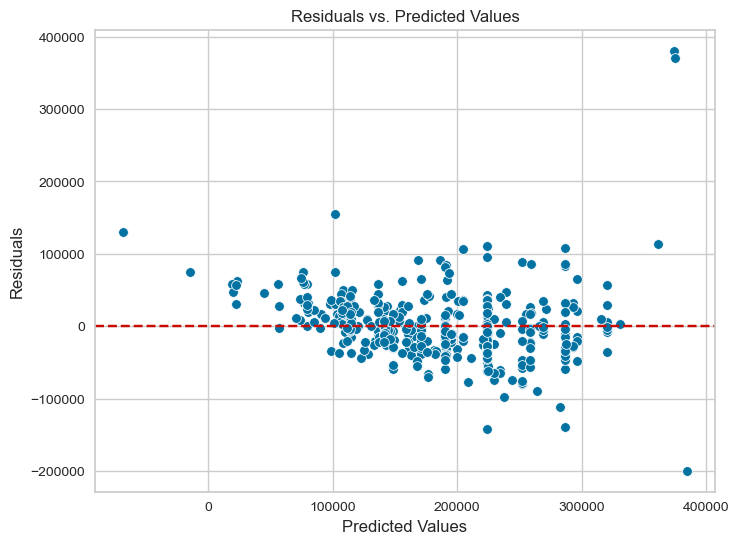

In [279]:

# Assuming you have a fitted model named 'model' and X_test and y_test are your test data
y_pred = base_model.predict(x_test)
residuals = y_test - y_pred

# Plotting residuals against predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero for reference
plt.show()



In [280]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(residuals, x_test)
print(f'p-value for Breusch-Pagan test: {p_value}')

# Interpret the p-value
if p_value < 0.05:
    print('Heteroscedasticity may be present.')
else:
    print('No evidence of heteroscedasticity.')

p-value for Breusch-Pagan test: 7.594338318021209e-05
Heteroscedasticity may be present.


In [281]:
# residual plot to check the heteroscedascity

y_pred_test=base_model.predict(x_test)

<Axes: xlabel='SalePrice'>

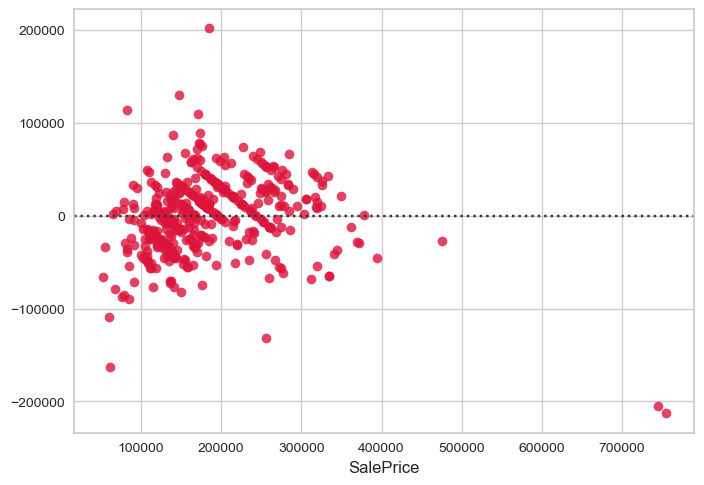

In [282]:
sns.residplot(x=y_test,y=y_pred_test,color="crimson")

#  Normality of residuals

C:\Users\Shefali\AppData\Local\Temp\ipykernel_18424\540683119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base_model.resid)


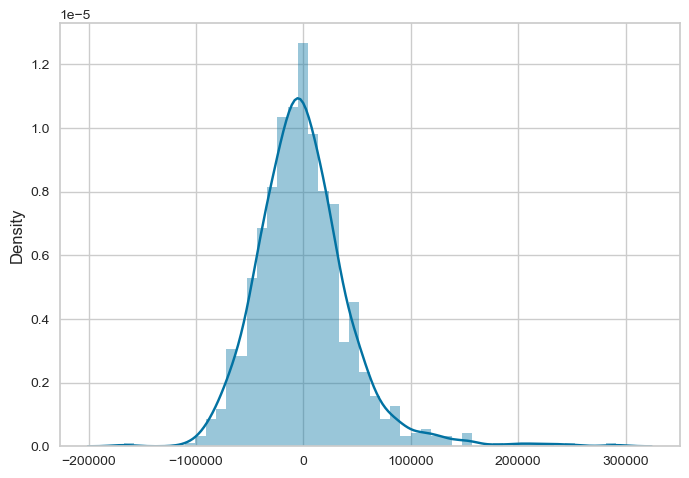

In [283]:
sns.distplot(base_model.resid)
plt.show()

In [284]:
from statsmodels.graphics.gofplots import qqplot # for QQ-plot

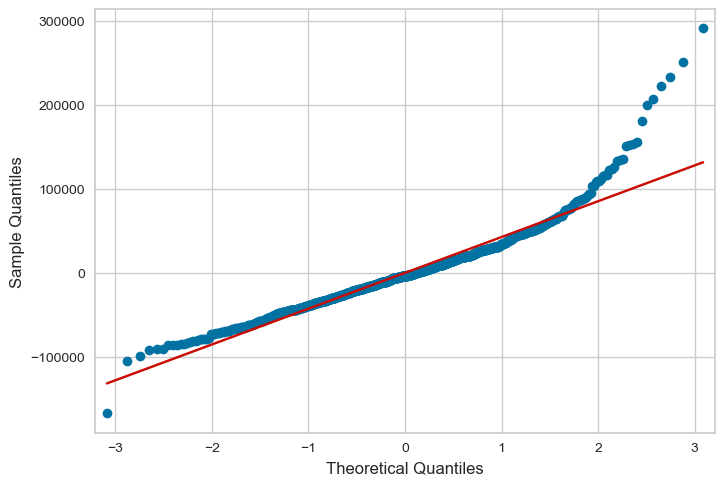

In [285]:
qqplot(base_model.resid,line="r")
plt.show()

In [286]:
house["SalePrice"].describe()

count      1418.000000
mean     182089.485896
std       79970.934085
min       34900.000000
25%      130000.000000
50%      164800.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# validate the base model

In [287]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [288]:
def validation(fitted_model,xtrain,ytrain,xtest,ytest):
    y_pred_test=fitted_model.predict(xtest)
    r2=r2_score(ytest,y_pred_test)
    print("R2:",r2)
    n=xtrain.shape[0]
    k=xtrain.shape[0]
    adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    print("Adj R2:",adj_r2)
    print("MSE:",mean_squared_error(ytest,y_pred_test))
    print("RMSE:",np.sqrt(mean_squared_error(ytest,y_pred_test)))
    print("MAE:",mean_absolute_error(ytest,y_pred_test))
    print("MAPE:",mean_absolute_percentage_error(ytest,y_pred_test))  
    residuals = ytest - y_pred_test
    
    # Scatter plot of observed vs. predicted values
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=ytest, y=y_pred_test)
    plt.title('Observed vs. Predicted Values')
    plt.xlabel('Observed Values')
    plt.ylabel('Predicted Values')
    plt.show()
    # Plotting residuals
    #plt.figure(figsize=(8, 6))
   # sns.scatterplot(x=ytest, y=residuals)
   # plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
   # plt.title('Residual Plot')
   # plt.xlabel('Actual Values')
   # plt.ylabel('Residuals')
   # plt.show()

R2: 0.6292245071778985
Adj R2: 368.4385133867026
MSE: 2234695651.982344
RMSE: 47272.56764744585
MAE: 31256.374677938842
MAPE: 0.1881311769961347


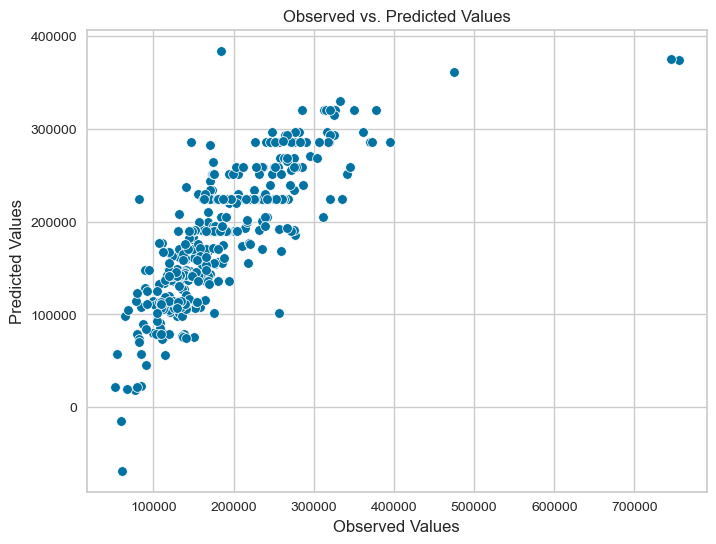

In [289]:
validation(base_model,x_train,y_train,x_test,y_test)

# lets try Sklearn models

In [290]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr=LinearRegression()
ridge=Ridge()
lasso=Lasso()
enet=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()

In [291]:
def model_validation(model,xtrain,ytrain,xtest,ytest):
    global m
    m = model.fit(xtrain,ytrain) # in skearn we use xtrain first
    print('%s'%model)
    print('Train parameters:')
    validation(m,xtrain,ytrain,xtrain,ytrain)
    print()
    print('Test parameters:')
    validation(m,xtrain,ytrain,xtest,ytest)   

LinearRegression()
Train parameters:
R2: 0.7029113159796202
Adj R2: 295.4148858641964
MSE: 1945029762.9308157
RMSE: 44102.491572821775
MAE: 31712.195162729662
MAPE: 0.1898282433758497


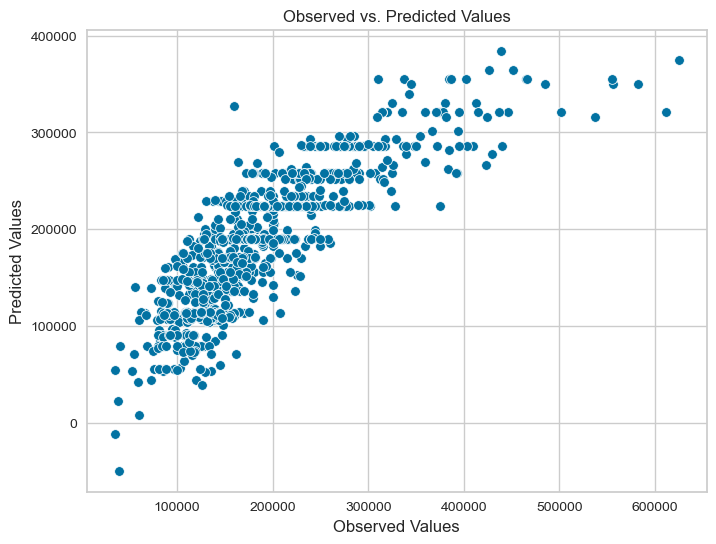


Test parameters:
R2: 0.6292245071778986
Adj R2: 368.43851338670254
MSE: 2234695651.982343
RMSE: 47272.56764744584
MAE: 31256.374677938824
MAPE: 0.1881311769961346


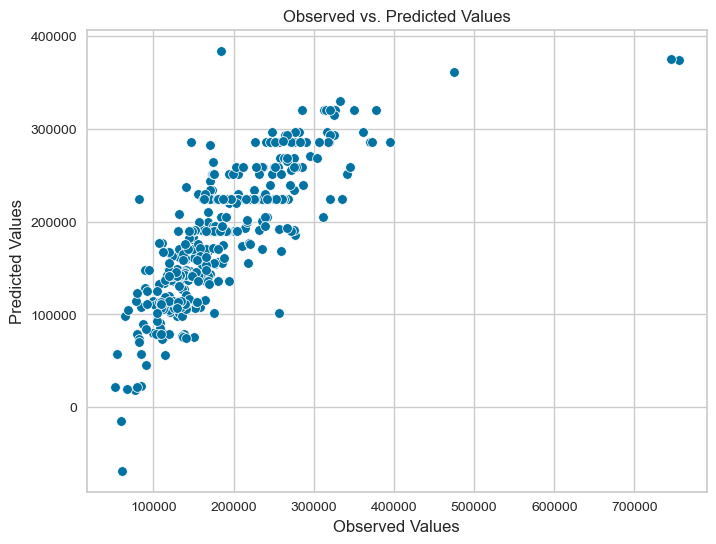

In [292]:
# linear regression
model_validation(LinearRegression(),x_train,y_train,x_test,y_test)

SGDRegressor(eta0=0.1)
Train parameters:
R2: 0.6032017441319808
Adj R2: 394.22707156520704
MSE: 2597825023.484878
RMSE: 50968.86327440389
MAE: 35998.644985583225
MAPE: 0.2029374471945254


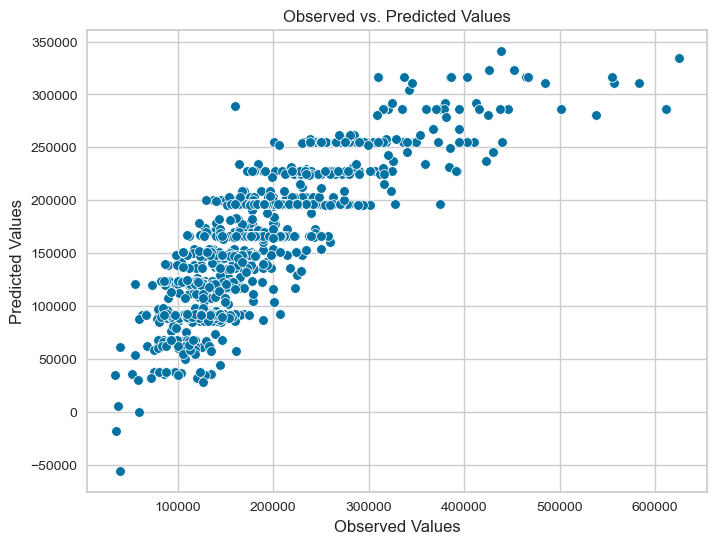


Test parameters:
R2: 0.5211791951666784
Adj R2: 475.5114175898217
MSE: 2885894001.50324
RMSE: 53720.517509637226
MAE: 36142.95100076255
MAPE: 0.20859721086376326


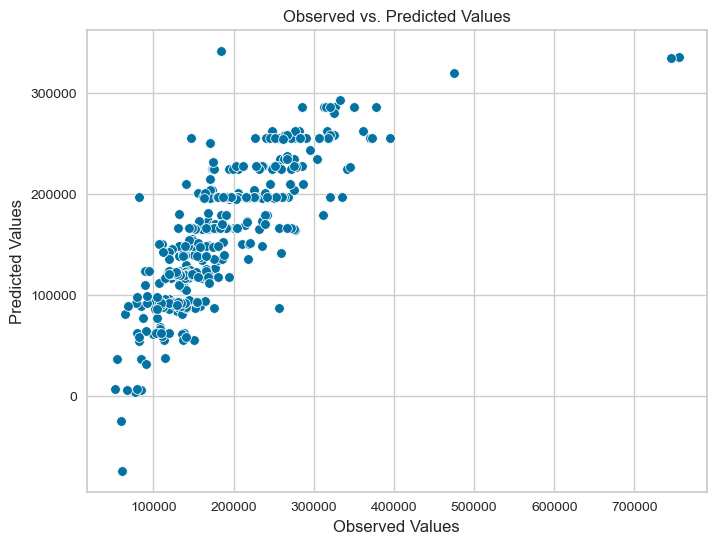

In [293]:
# stochastic Gradeint s=descent(scaled data)
model_validation(SGDRegressor(eta0=0.1),x_train,y_train,x_test,y_test)

Lasso(alpha=10)
Train parameters:
R2: 0.7029094078563374
Adj R2: 295.41677681436965
MSE: 1945042255.3506753
RMSE: 44102.63320200593
MAE: 31709.491216959923
MAPE: 0.18980554313893772


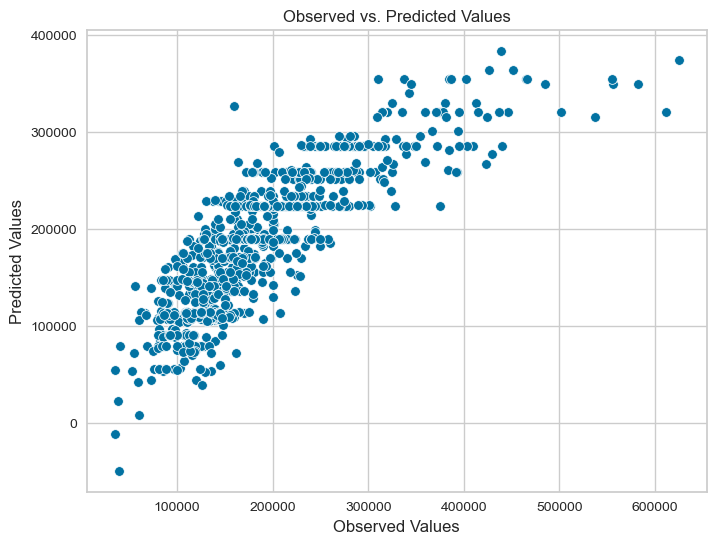


Test parameters:
R2: 0.6293878431809019
Adj R2: 368.2766474077262
MSE: 2233711211.9025927
RMSE: 47262.154118306884
MAE: 31247.790640170344
MAPE: 0.18805972624707196


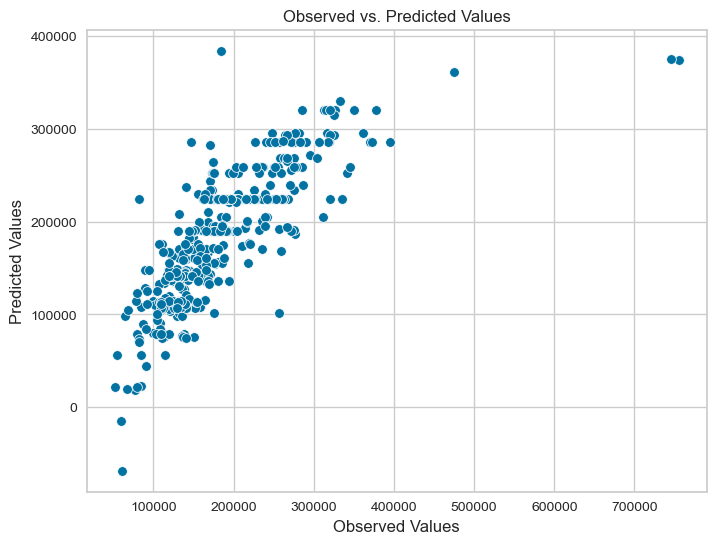

In [294]:
# regularization-- Regularization may affect the performance because model is underfitted 
# lasso
model_validation(Lasso(alpha=10),x_train,y_train,x_test,y_test)

In [295]:
pd.DataFrame({"coef":m.coef_},index=x_train.columns)

,coef
const,0.000000
OverallQual,34397.487575
Electrical,2083.859985
FullBath,19367.889715
GarageType,-19206.762697
GarageCars,27621.752065
Fence,-933.750639
MiscFeature,-3532.349842


Ridge(alpha=10)
Train parameters:
R2: 0.7027304311391311
Adj R2: 295.59414274112106
MSE: 1946214009.9834228
RMSE: 44115.9156085808
MAE: 31632.723984376415
MAPE: 0.1889340753777917


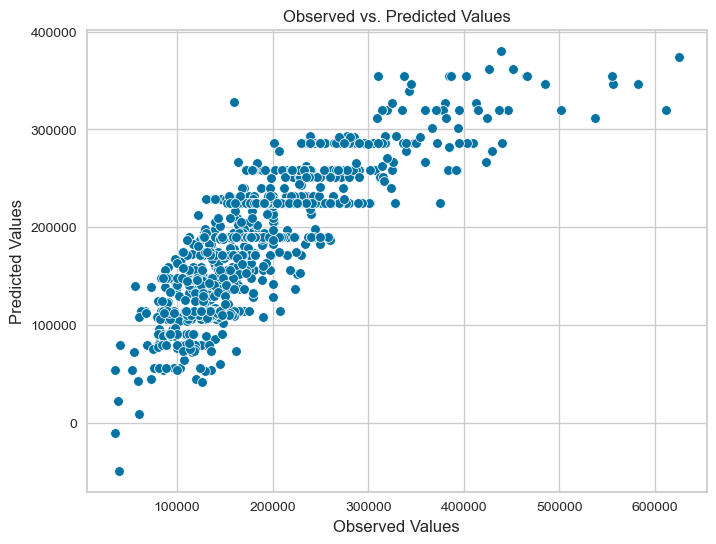


Test parameters:
R2: 0.631098028251889
Adj R2: 366.581854002378
MSE: 2223403780.00322
RMSE: 47152.982726474685
MAE: 31160.628117173826
MAPE: 0.18733369838046868


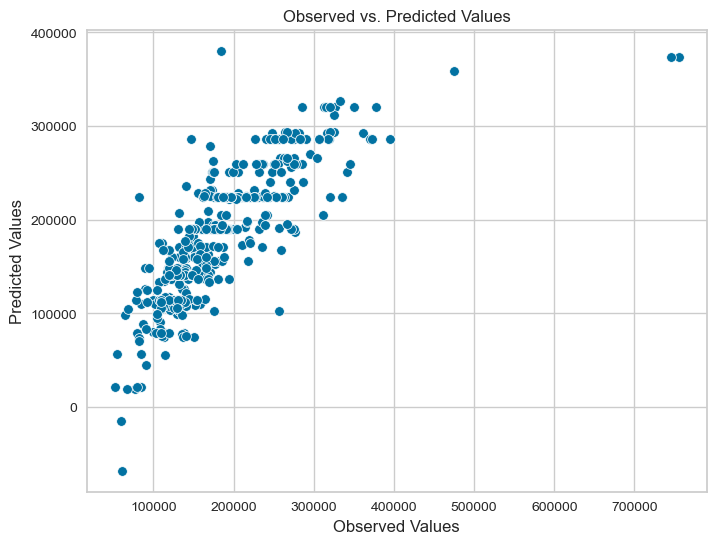

In [296]:
# Ridge
model_validation(Ridge(alpha=10),x_train,y_train,x_test,y_test)

## other Algorithms(other models)

KNeighborsRegressor()
Train parameters:
R2: 0.7979779984807512
Adj R2: 201.20380350557554
MSE: 1322631344.971855
RMSE: 36367.99891349337
MAE: 25807.022177419356
MAPE: 0.150097689126489


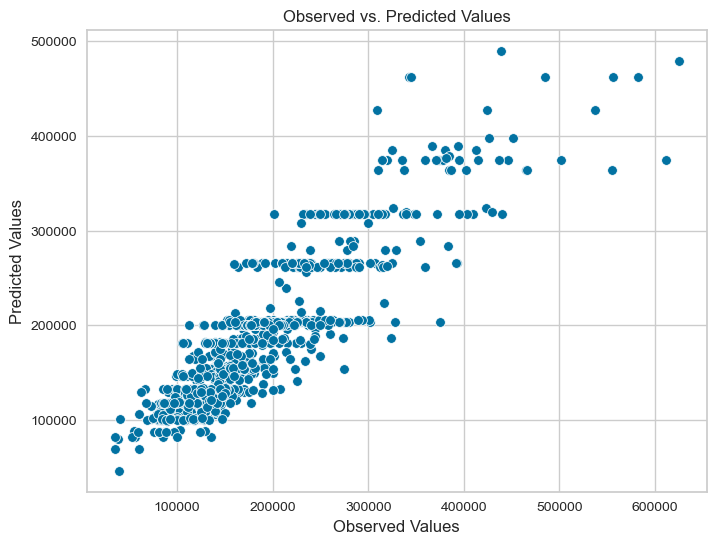


Test parameters:
R2: 0.6404345543458827
Adj R2: 357.32935664323026
MSE: 2167131737.5657277
RMSE: 46552.46220733902
MAE: 30570.7882629108
MAPE: 0.16722319475754552


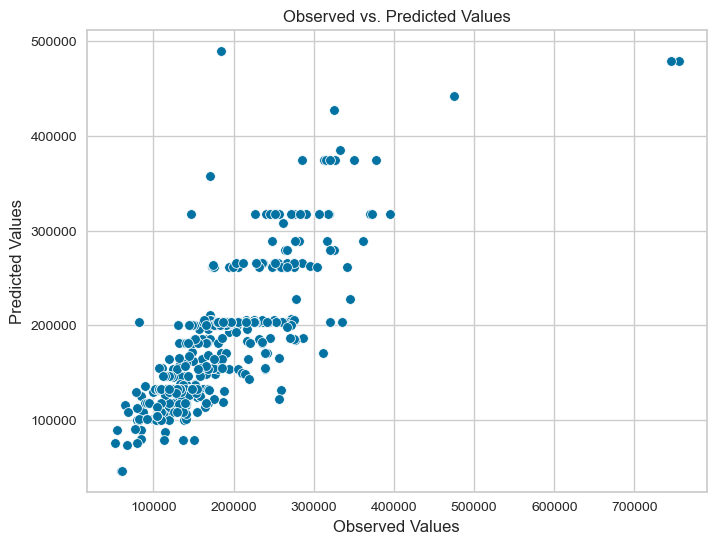

In [297]:
model_validation(KNeighborsRegressor(n_neighbors=5),x_train,y_train,x_test,y_test)

DecisionTreeRegressor(max_depth=8)
Train parameters:
R2: 0.8350462211791174
Adj R2: 164.46919481149465
MSE: 1079946920.1341722
RMSE: 32862.545855946286
MAE: 22453.919752238136
MAPE: 0.13146152035042744


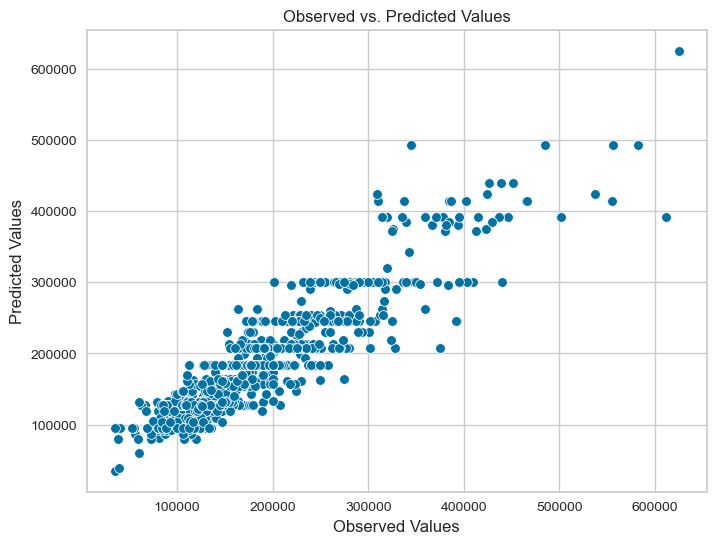


Test parameters:
R2: 0.7134510340669439
Adj R2: 284.97002523965864
MSE: 1727055160.4603431
RMSE: 41557.85317434411
MAE: 28481.316386230465
MAPE: 0.1599365479011043


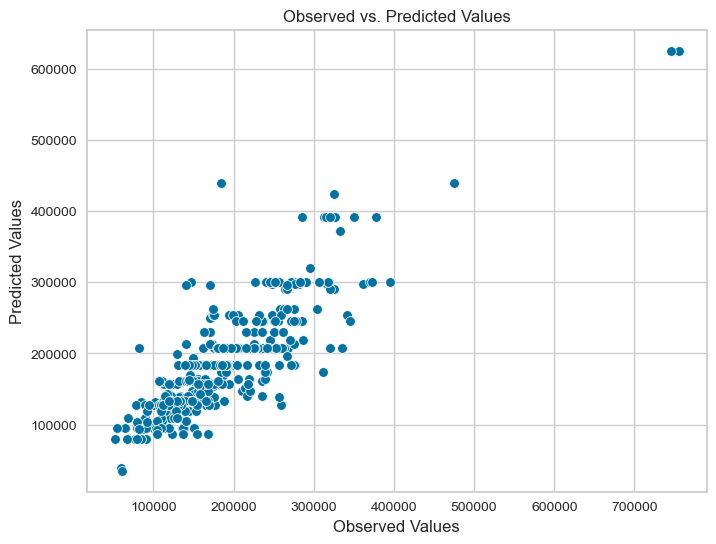

In [298]:
model_validation(DecisionTreeRegressor(max_depth=8),x_train,y_train,x_test,y_test)

GradientBoostingRegressor(max_depth=5, n_estimators=300)
Train parameters:
R2: 0.8457601130031986
Adj R2: 153.85172801383015
MSE: 1009803425.6305931
RMSE: 31777.404324938074
MAE: 21135.997362776077
MAPE: 0.11897870397616693


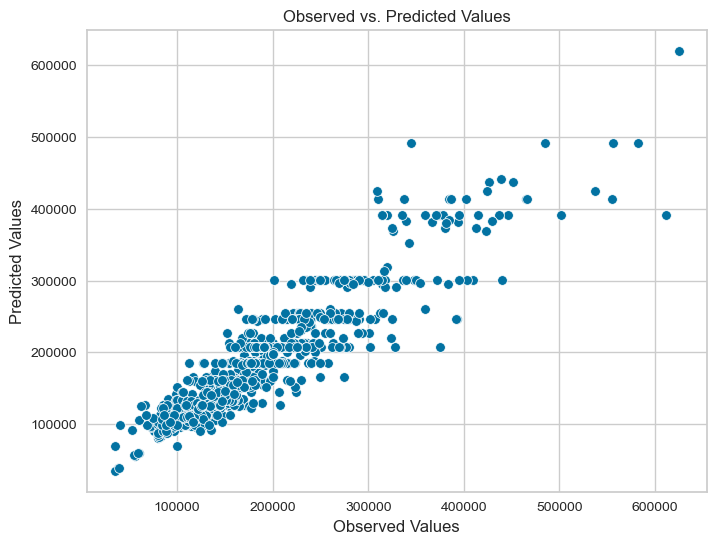


Test parameters:
R2: 0.70824898858515
Adj R2: 290.1252523121164
MSE: 1758408334.1318214
RMSE: 41933.37971272792
MAE: 28948.676580631116
MAPE: 0.16218668040934445


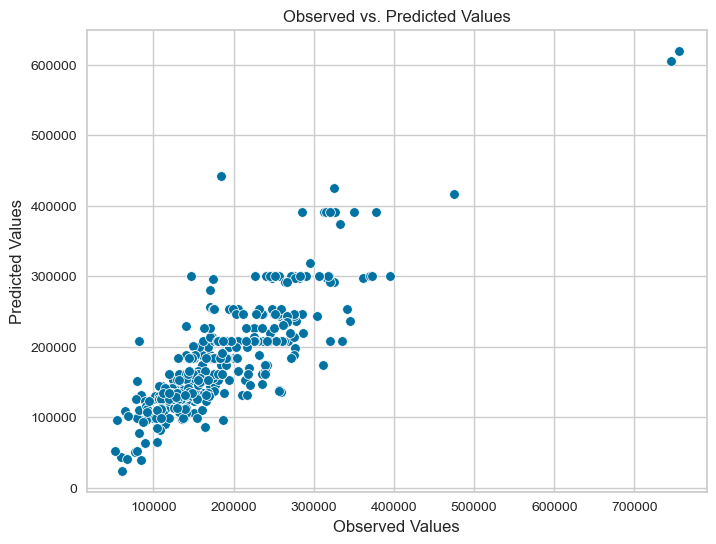

In [299]:
model_validation(GradientBoostingRegressor(n_estimators=300,max_depth=5),x_train,y_train,x_test,y_test)

RandomForestRegressor()
Train parameters:
R2: 0.8411667563549876
Adj R2: 158.4037444522073
MSE: 1039875979.2924275
RMSE: 32247.10807642179
MAE: 22177.755830117854
MAPE: 0.12629625489418225


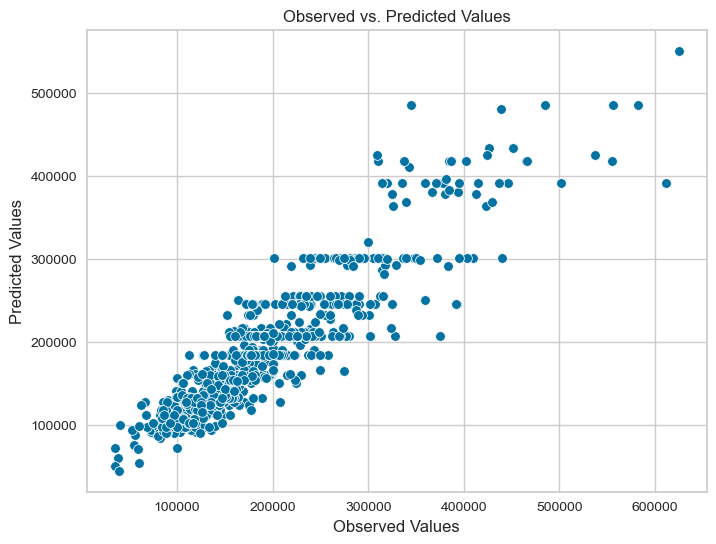


Test parameters:
R2: 0.6857841814127452
Adj R2: 312.3878762199695
MSE: 1893805651.0598896
RMSE: 43517.87737309679
MAE: 29101.97305888297
MAPE: 0.15975291003498338


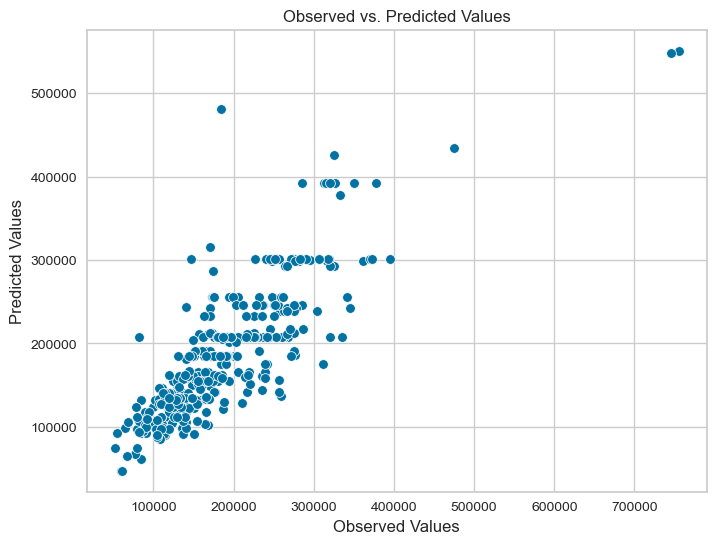

In [300]:
model_validation(RandomForestRegressor(n_estimators=100,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,),x_train,y_train,x_test,y_test)

# kfold

In [301]:
from sklearn.model_selection import KFold, cross_val_score

In [302]:
kfcv = KFold(n_splits=5,random_state=1,shuffle=True)

In [303]:
model = GradientBoostingRegressor(n_estimators=300,max_depth=5)

In [304]:
score = cross_val_score(estimator=model,
                       X=x_train,y=y_train,
                       cv=kfcv,scoring='r2')
score

array([0.77549147, 0.69211138, 0.69908484, 0.73268224, 0.61072861])

In [305]:
print('Sum:',np.mean(score),'Std dev:',np.std(score))

Sum: 0.7020197061501741 Std dev: 0.05436753261467227


In [306]:
model.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [307]:
model.predict(x_test)

array([137207.45706396, 207473.99159744, 207473.99159744, 246104.64477651,
        96044.95468992, 297161.90456878,  98329.54600151, 219646.78473782,
       297161.90456878, 125494.32468382, 126178.92273501, 207473.99159744,
       297161.90456878, 115428.65806682, 246104.64477651, 125638.28837747,
       101056.93875092, 102438.49636072, 207473.99159744, 300872.80029847,
       254107.57254602, 184670.30944044, 254107.57254602, 146382.33657678,
       131810.70000097, 291497.10971239, 243042.77280655, 143878.62807406,
       131545.84431181, 111707.81829281, 246104.64477651, 207473.99159744,
        90284.47932228, 146979.06684901, 390969.78952233, 161049.15305593,
       136140.21330794, 125494.32468382,  98329.54600151, 126178.92273501,
       155082.78123511,  98961.5963126 , 184670.30944044, 237576.91199784,
       184670.30944044, 212623.51298997, 122445.47357441, 246104.64477651,
       184670.30944044, 173582.50197689,  98961.5963126 , 130933.85367319,
        97138.92025236, 3

GradientBoostingRegressor(max_depth=5, n_estimators=300)
Train parameters:
R2: 0.8457601130031986
Adj R2: 153.85172801383015
MSE: 1009803425.6305931
RMSE: 31777.404324938074
MAE: 21135.997362776077
MAPE: 0.11897870397616693


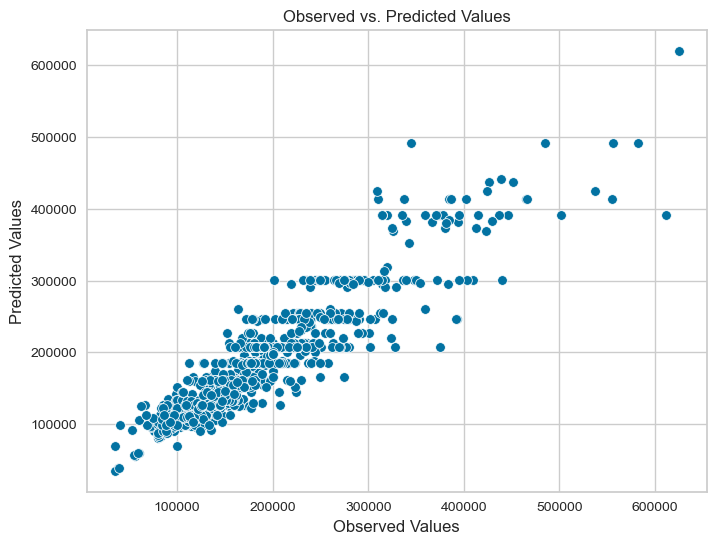


Test parameters:
R2: 0.7082410364176128
Adj R2: 290.1331329101457
MSE: 1758456262.5266676
RMSE: 41933.9511914471
MAE: 28937.546893601546
MAPE: 0.16209041639413133


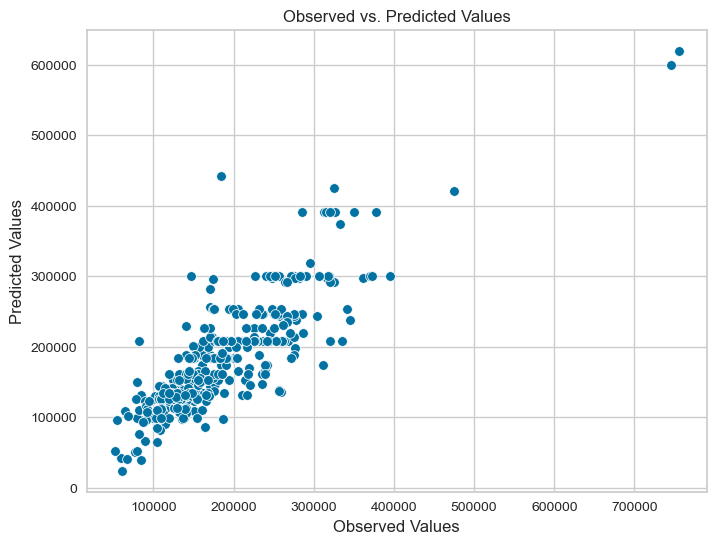

In [308]:
model_validation(model,x_train,y_train,x_test,y_test)

GradientBoostingRegressor(criterion='squared_error', max_depth=None,
                          n_estimators=300)
Train parameters:
R2: 0.8473105012371575
Adj R2: 152.31529327397698
MSE: 999653085.2731636
RMSE: 31617.2909224235
MAE: 20607.152630315693
MAPE: 0.11487319498810193


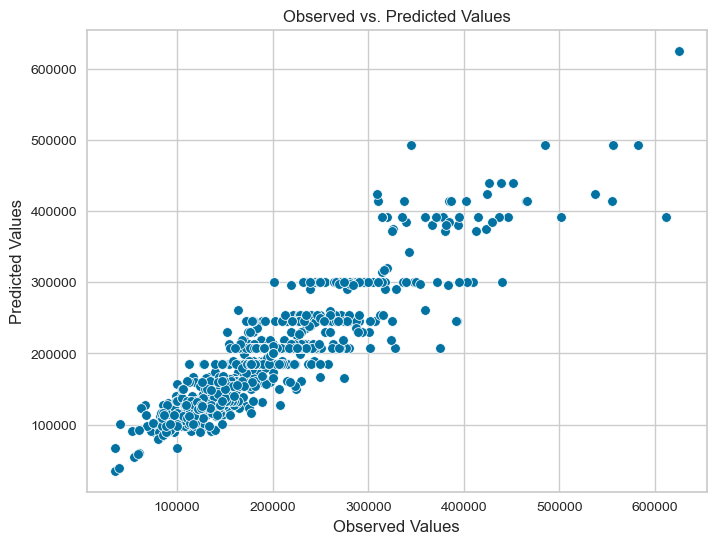


Test parameters:
R2: 0.68796595130285
Adj R2: 310.22574225887564
MSE: 1880655937.0646813
RMSE: 43366.53014785344
MAE: 30399.815949277734
MAPE: 0.17294431518412082


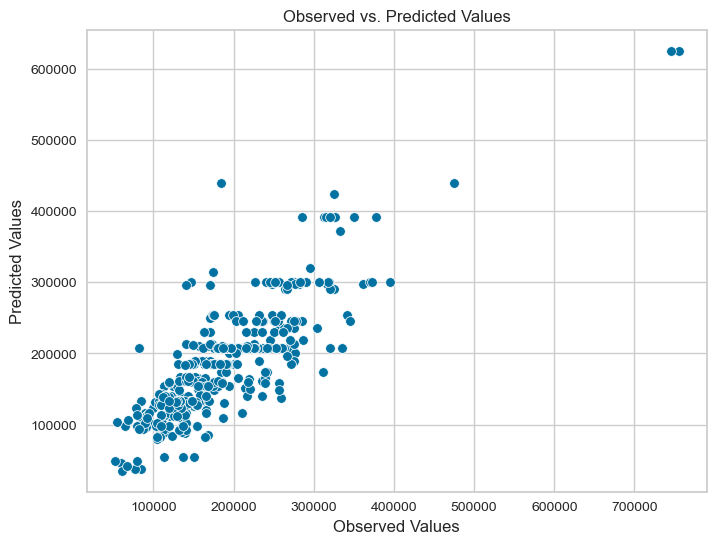

In [309]:
model_validation(GradientBoostingRegressor(n_estimators=300,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,),x_train,y_train,x_test,y_test)

DecisionTreeRegressor(max_depth=6, max_features=13, min_samples_leaf=2,
                      min_samples_split=3, random_state=200)
Train parameters:
R2: 0.8115302600749166
Adj R2: 187.77351226575766
MSE: 1233905137.7028244
RMSE: 35126.98588980877
MAE: 25005.309352167274
MAPE: 0.14773933434894496


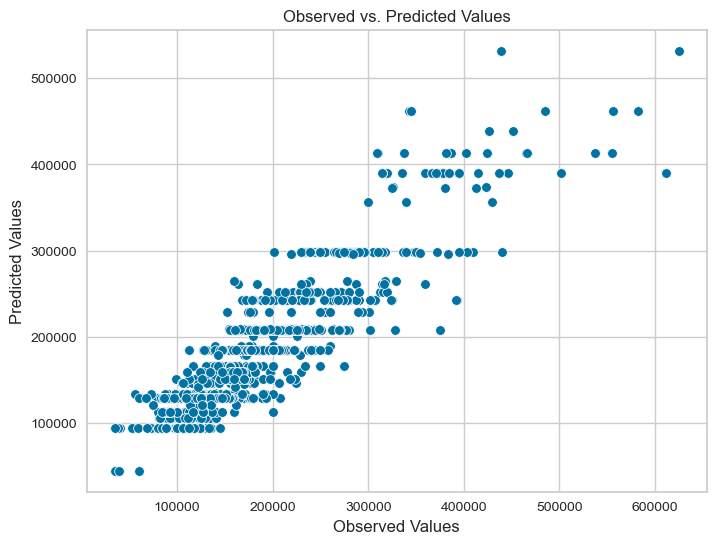


Test parameters:
R2: 0.6798987806050223
Adj R2: 318.2203084204229
MSE: 1929277465.809798
RMSE: 43923.54113467854
MAE: 28663.60739810658
MAPE: 0.16040563487474552


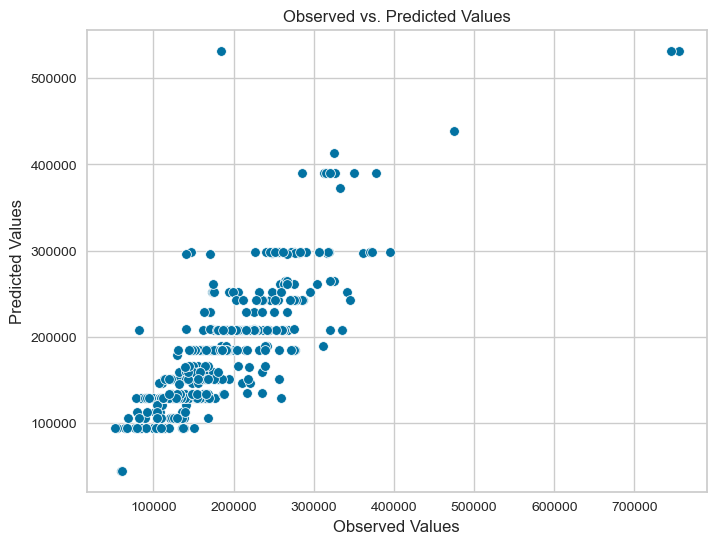

In [311]:
model_validation(DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=6,
    min_samples_split=3,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=13,
    random_state=200,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
   
    ccp_alpha=0.0),x_train,y_train,x_test,y_test)